# 03.02 interpolation: error

##### code, support for section text

In [2]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [3]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  import numpy.polynomial as npp
  import scipy as sp
  from tabulate import tabulate


###### code, utility

In [4]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef


In [5]:
def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p


###### code, examples

In [6]:
def eg_08():

  # known
  xs = np.array([-1,-0.5,0,0.5,1])

  # calc
  ys = np.exp(xs)
  xs_moar = np.arange(-3,3,.1)
  ys_moar = np.exp(xs_moar)
  cdd = divided_diff(xs,ys)[0,:]
  ps_moar = newton_poly(cdd,xs,xs_moar)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(xs,ys,c="C0",marker="o",label="some data")
  plt.plot(xs_moar,ys_moar,c="C1",linestyle=":",label="$e^x$")
  plt.plot(xs_moar,ps_moar,c="C2",linestyle=":",label="$P_4$")

  # plot, style
  plt.grid()
  plt.title("$P_4(x) \\sim e^x$\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("why not")
  plt.xlabel("x")
  #plt.xlim(.70,.80)
  #plt.ylim(0,2.5)
  # plot, show
  plt.show()


In [7]:
def eg_09():

  f = lambda x: 1/(1+12*pow(x,2))

  # known
  input = np.array([[-3,0],[-2.5,0],[-2,0],[-1.5,0],[-1,0],[-0.5,0],[0,1],[0.5,0],[1,0],[1.5,0],[2,0],[2.5,0],[3,0]])
  xs = np.arange(-3.1,3.1,0.1)

  # calc
  fs = f(xs)
  cdd = divided_diff(input[:,0],input[:,1])[0,:]
  ps = newton_poly(cdd,input[:,0],xs)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(input[:,0],input[:,1],c="C0",marker="o",label="some data")
  plt.plot(xs,fs,c="C1",linestyle=":",label="$f(x) = (1+12x^2)^{-1}$")
  plt.plot(xs,ps,c="C2",linestyle=":",label="$N_{12}(x)$")

  # plot, set style
  plt.grid()
  plt.title("runge effect\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylim(-3,3)
  plt.ylabel("y")
  plt.xlabel("x")
  # plot, show
  plt.show()


## 1 interpolation error formula

<b><font color=grey>theorem 04</font></b>

assume that $P(x)$ is the (degree $n-1$ or less) interpolating polynomial fitting the $n$ points $(x_1,y_1),\dots,(x_n,y_n)$. interpolation error,

$$f(x) - P(x) = \frac{(x-x_1)(x-x_2)\dots(x-x_n)}{n!}f^{(n)}(c),$$

where $c$ lies between the smallest and largest of $\{x: x_1,\dots,x_n\}$.

continuing example 07,

$$sin\,x - P(x) = \frac{(x-0)(x-\frac{\pi}{6})(x-\frac{\pi}{3})(x-\frac{\pi}{2})}{4!} f''''(c),$$

where $0 < c < \frac{\pi}{2}, f''''(c) = sin\,c\in[0,1]$. ie, at worst, $|sin\,c| = |1|$ so,

\begin{align}
  |sin\,x - P(x)| &\le \frac{|(x-0)(x-\frac{\pi}{6})(x-\frac{\pi}{3})(x-\frac{\pi}{2})|}{24}|1|. \\ \\
  &\Downarrow \quad\text{worst case @ }x=1 \\ \\
  |sin\,1 - P(1)| &\le \frac{|(1-0)(1-\frac{\pi}{6})(1-\frac{\pi}{3})(1-\frac{\pi}{2})|}{24}|1| \approx 0.0005348.
\end{align}

computational error at $x=1$ from example 07 (below) is less than this upper bound. $\checkmark$

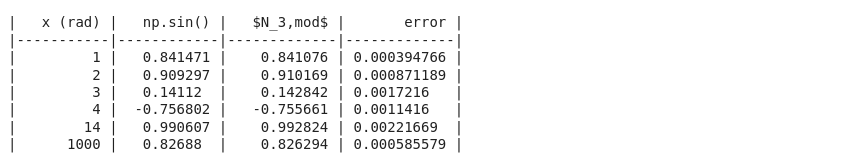

consider upper bound at $x=0.2$, near the end of the evaluation interval.

$$
|sin\,0.2 - P(0.2)| \le \frac{|(0.2-0)(0.2-\frac{\pi}{6})(0.2-\frac{\pi}{3})(0.2-\frac{\pi}{2})|}{24}|1| \approx 0.00313,
$$

about six times larger. correspondingly, the actual error is larger as well.

$$|sin\,0.2 - P(0.2)| = |0.19867 - 0.20056| = 0.00189.$$

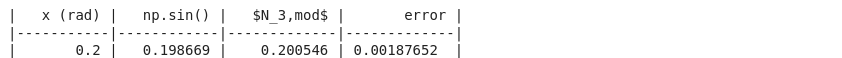

##### example 08

find upper bound for difference at $x=0.25,x=0.75$ between $f(x) = e^x$ and polynomial that interpolates it at $x\in\{-1,-0.5,0,0.5,1\}$.

no need to construct interpolating polynomial.

\begin{align}
  f(x) - P_4(x) &= \frac{(x+1)(x+\frac{1}{2})x(x-\frac{1}{2})(x-1)}{5!}f^{(5)}(c), \\ \\
  &\Downarrow\quad \text{where } -1<c<1,\text{ }f^{(5)}(c) = e^c \Rightarrow |f^{(5)}|\le e^1 \text{ on } [-1,1] \\ \\
  |e^x - P_4(x)| &\le \frac{(x+1)(x+\frac{1}{2})x(x-\frac{1}{2})(x-1)}{5!}e \\ \\
  &\Downarrow\quad x=0.25 \\ \\
  |e^{0.25} - P_4(0.25)| &\le \frac{(0.25+1)(0.25+\frac{1}{2})(0.25)(0.25-\frac{1}{2})(0.25-1)}{120}e \approx 0.000995 \\ \\
  &\Downarrow\quad x=0.75 \\ \\
  |e^{0.75} - P_4(0.75)| &\le \frac{(0.75+1)(0.75+\frac{1}{2})(0.75)(0.75-\frac{1}{2})(0.75-1)}{120}e \approx 0.002323. \\ \\
\end{align}

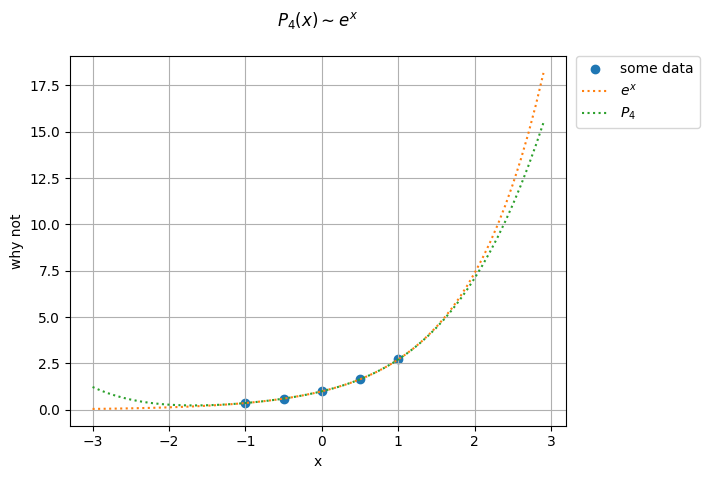

In [8]:
eg_08()

## 2 proof of newton form and error formula

known so far: if $n$ distinct points $x_1,\dots,x_n$ and arbitrary $y_1,\dots,y_n$, then exactly one interpolating polynomial $P_{n-1}$ of degree $d\le n-1$ exists. lagrange gives such a polynomial. now prove that newtons divided difference does as well.

let $P(x)$ denote the (unique) polynomial that interpolates $(x_1,f(x_1)),\dots,(x_n,f(x_n))$, and denote by $f[x_1\,\dots\,x_n]$ the degree $n-1$ coefficient of $P(x)$. thus $P(x) = a_0 + a_1x + a_2x^2 + \dots + a_{n−1}x^{n−1}$, where $a_{n−1} = f[x_1\,\dots\,x_n]$. also, two facts are readily apparent.

##### <b><font color=grey>fact 01</font></b>

 $f[x_1 \dots x_n] = f[\sigma(x_1) \dots \sigma(x_n)]$ for any permutation $\sigma$ of $x_i$.

###### proof

by uniqueness of interpolating polynomial (theorem 02).

##### <b><font color=grey>fact 02</font></b>

$P(x)$ can be written in the form

$$P(x) = c_0 + c_1(x-x_1) + c_2(x-x_1)(x-x_2) + \dots + c_{n-1}(x-x_1) \dots (x-x_{n-1}).$$

###### proof

choose $c_{n-1} = a_{n−1}$. the remaining $c_{n-2},c_{n−3}, \dots ,c_0$ are defined recursively by setting $c_k$ to be the degree $k$ coefficient of the (degree at most $k$) polynomial

$$P(x) = c_{n−1}(x-x_1) \dots (x-x_{n−1}) - c_{n−2}(x-x_1) \dots (x-x_{n−2}) - \dots - c_{k+1}(x-x_1) \dots (x-x_{k+1}).$$

(this is a degree at most $k$ polynomial due to the choice of $c_{k+1}$.)

##### <b><font color=grey>theorem 05</font></b>

let $P(x)$ be the interpolating polynomial of $(x_1,f(x_1)), \dots , (x_n,f(x_n))$ where the $x_i$ are distinct. then

1. $P(x) = f[x_1]$ $+ f[x_1\,x_2](x-x_1)$ $+ f[x_1\,x_2\,x_3](x-x_1)(x-x_2)$ $+ \dots$ $+ f[x_1\,x_2\,\dots\,x_n](x-x_1)(x-x_2)$ $\dots$ $(x-x_{n−1})$, and
2. for $k>1, f[x_1\,\dots\,x_k] = \frac{f[x_2\,\dots\,x_k] - f[x_1\,\dots\,x_{k−1}]}{x_k−x_1}$.

###### proof

1. prove that $c_{k−1} = f[x_1\,\dots\,x_k]$ for $k = 1, \dots,n$.

it is already clear for $k=n$ by definition. successively substitute $x_1,\dots,x_k$ into the form of $P(x)$ in fact 02. only the first $k$ terms are nonzero. conclude that the polynomial consisting of the first $k$ terms of $P (x)$ is sufficient to interpolate $x_1,\dots,x_k$, and so by definition 02 and the uniqueness of interpolating polynomial, $c_{k−1} = f[x_1\,\dots\,x_k]$. $\checkmark$

2. and

- by (1) the interpolating polynomial of $x_2,x_3,\dots,x_{k-1},x_1,x_k$ is

\begin{align}
  P_1(x) &= f[x_2] + f[x_2\,x_3](x-x_2) + \dots \\
  &\quad + f[x_2\,x_3\,\dots\,x_{k-1}\,x_1](x-x_2) \dots (x-x_{k-1}) \\
  &\quad + f[x_2\,x_3\,\dots\,x_{k-1}\,x_1\,x_k](x-x_2) \dots (x-x_{k-1})(x-x_1) \\
\end{align}

- and the interpolating polynomial of $x_2,x_3,\dots,x_{k-1},x_k,x_1$ is

\begin{align}
  P_2(x) &= f[x_2] + f[x_2\,x_3](x-x_2) + \dots \\
  &\quad + f[x_2\,x_3\,\dots\,x_{k-1}\,x_k](x-x_2) \dots (x-x_{k-1}) \\
  &\quad + f[x_2\,x_3\,\dots\,x_{k-1}\,x_k\,x_1](x-x_2) \dots (x-x_{k-1})(x-x_k) \\
\end{align}

- by uniqueness, $P_1=P_2$. set $P_1(x_k) = P_2(x_k)$ and canceling terms yields

\begin{align}
  f[x_2\,\dots\,x_{k-1}\,x_1](x_k-x_2)\dots(x_k-x_{k-1}) &+ f[x_2\,\dots\,x_{k-1}\,x_1\,x_k](x_k-x_2) \dots (x_k-x_{k-1})(x_k-x_1) \\
  = f[x_2\,\dots\,x_{k-1}\,x_k](x_k-x_2) \dots (x_k-x_{k-1}) &+ f[x_2\,\dots\,x_{k-1}\,x_k\,x_1](x_k-x_2) \dots (x_k-x_{k-1})(x_k-x_k) \\ \\
  &\Downarrow \\ \\
  f[x_2\,\dots\,x_{k-1}\,x_1] &+ f[x_2\,\dots\,x_{k-1}\,x_1\,x_k](x_k-x_1) = f[x_2\,\dots\,x_k] \\ \\
  &\Downarrow \\ \\
  f[x_1\,\dots\,x_k] &= \frac{f[x_2\,\dots\,x_k] - f[x_1\,\dots\,x_{k-1}]}{x_k - x_{k-1}}. \blacksquare
\end{align}

##### <b><font color=grey>theorem 04 again</font></b>

###### proof of interpolation error

now that its easier, add one more point $x$ to $n$ distinct points. then

$$P_n(t) = P_{n-1}(t) + f[x_1\,\dots\,x_n\,x](t-x_1)\dots(t-x_n).$$

evaluated at extra point $x, P_n(x) = f(x)$,

$$f(x) = P_{n-1}(x) + f[x_1\,\dots\,x_n\,x](x-x_1)\dots(x-x_n).$$

this is true for all $x$. define

$$h(t) = f(t) - P_{n-1}(t) - f[x_1\,\dots\,x_n\,x](t-x_1)\dots(t-x_n).$$

$h(x) = 0$ and $0 = h(x_1) = \dots = h(x_n)$ bc $P_{n-1}$ interpolates $f$ at these points. between each neighboring pair of the $n+1$ points $x,x_1,\dots,x_n$, there must be a new point where $h'=0$ by [rolles theorem](https://en.wikipedia.org/wiki/Rolle%27s_theorem). there are $n$ of these points. between each pair of these, there must be a new point where $h''=0$; there are $n-1$ of these. usw, there must be one point $c$ for which $h^{(n)}(c) = 0$ lies between the smallest and largest of $\{x: x_1,\dots,x_n\}$. note

$$h^{(n)}(t) = f^{(n)}(t) - n!f[x_1\,\dots\,x_n\,x],$$

bc $n$th derivative of polynomial $P_{n-1}(t)$ is zero. substituting $c$ gives

\begin{align}
  f[x_1\,\dots\,x_n\,x] &= \frac{f^{(n)}(c)}{n!} \\ \\
  &\Downarrow \\ \\
  f(x) &= P_{n-1}(x) + \frac{f^{(n)}(c)}{n!}(x-x_1)\dots(x-x_n). \quad\checkmark
\end{align}

#### runge phenomenon

polynomials can fit any set of points but is that really whats best for society?

##### example 09

consider points below. compare their polynomial interpolation with $f(x) = (1 + 12x^2)^{-1}$.

||1|2|3|4|5|6|7|8|9|10|11|12|13|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|x|-3.0|-2.5|-2.0|-1.5|-1.0|-0.5|0.0|0.5|1.0|1.5|2.0|2.5|3.0|
|y|0.0|0.0|0.0|0.0|0.0|0.0|1.0|0.0|0.0|0.0|0.0|0.0|0.0|


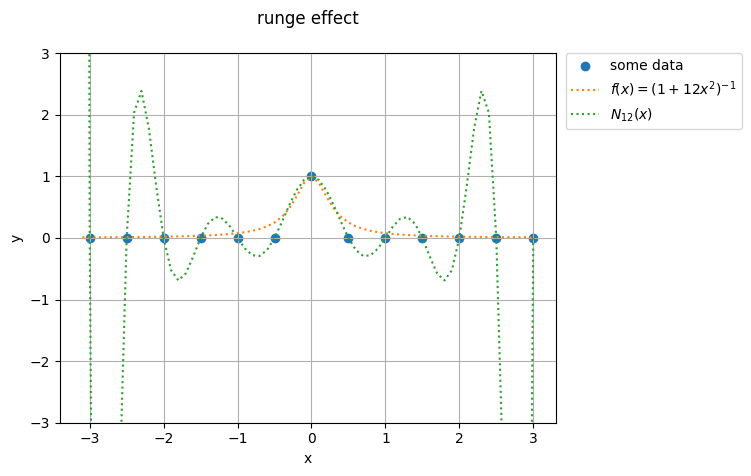

In [9]:
eg_09()